# Центральная предельная теорема

## Экспоненциальное распределение

### 1. Сгенерируем выборку объема 1000, построим гистограмму выборки 

In [120]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import pandas as pd
import math

Text(0.5, 0, 'x')

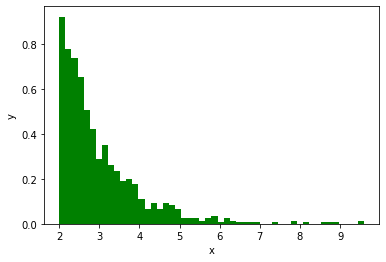

In [121]:
#Теоретические параметры экспоненциального распределения
lambd = 2 # интенсивность или обратный коэф. масштаба
E = 0.5 # мат. ожидание
D = 0.25 # дисперсия

exp_rv = sts.expon(lambd)
r = exp_rv.rvs(1000)

plt.hist(r, bins = 50, density = True, color = 'green')
plt.ylabel('y')
plt.xlabel('x')

### 2. Нарисуем поверх гистограммы теоретическую плотность экспоненциального распределения

(1.5, 7.0)

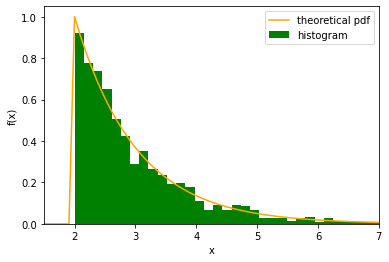

In [124]:
x = np.linspace(0, 9, 100)
pdf = exp_rv.pdf(x)
plt.plot(x, pdf, color = 'orange', label='theoretical pdf')
plt.hist(r, bins = 50, density = True, stacked = True, color = 'green', label = 'histogram')
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(1.5, 7)

### 3. Оценим распределение выборочного среднего случ. величины при разных объемах выборок:

#### 3.а. При объеме выборки n = 5 и количестве выборок k = 1000:

(array([0.08520746, 0.08520746, 0.1278112 , 0.25562239, 0.1278112 ,
        0.29822612, 0.38343359, 0.38343359, 0.29822612, 0.25562239,
        0.25562239, 0.51124478, 0.76686717, 0.29822612, 0.72426344,
        0.72426344, 1.02248956, 0.59645225, 0.63905598, 0.89467837,
        0.97988583, 0.80947091, 0.51124478, 1.0650933 , 1.23550822,
        0.97988583, 1.23550822, 1.36331942, 0.9372821 , 0.89467837,
        1.19290449, 0.72426344, 0.9372821 , 0.55384851, 1.15030076,
        0.9372821 , 0.9372821 , 0.68165971, 0.72426344, 0.76686717,
        0.68165971, 1.02248956, 0.72426344, 0.89467837, 0.97988583,
        0.29822612, 0.68165971, 0.46864105, 0.42603732, 0.59645225,
        0.72426344, 0.55384851, 0.42603732, 0.63905598, 0.51124478,
        0.59645225, 0.38343359, 0.25562239, 0.34082985, 0.17041493,
        0.1278112 , 0.21301866, 0.25562239, 0.25562239, 0.29822612,
        0.1278112 , 0.29822612, 0.08520746, 0.29822612, 0.1278112 ,
        0.08520746, 0.08520746, 0.25562239, 0.08

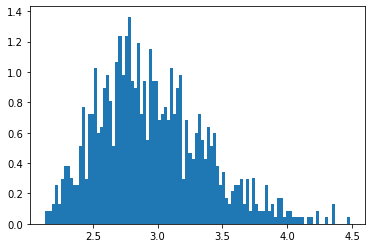

In [82]:
n = 5
samples_5 = np.array([]) # массив из выборочных средних
for i in range(1000): # для количества выборок 1000
    samp5 = exp_rv.rvs(n) # генерация выборки объемом n
    mean5 = sum(samp5)/n # вычисление выборочного среднего для выборки
    samples_5 = np.append(samples_5, mean5) # добавляем выборочное среднее в массив
plt.hist(samples_5, bins=100, density=True, stacked=True)

Определим значения параметров нормального распределения, которыми (согласно Ц.П.Т.) приближается распределение выборочных средних:

In [83]:
# при n = 5 и k = 1000
D_5 = D / n # дисперсия
sigma_5 = math.sqrt(D_5) # стандартное среднеквадратическое отклонение
E_5 = sum(samples_5) / 1000 # мат. ожидание
norm_5 = sts.norm(E_5, sigma_5) # нормальное распределение для расчетных характеристик экспоненциального распределения
x = np.linspace(2, 4, 100)
pdf_5 = norm_5.pdf(x) # плотность распределения

Строим гистограмму массива средних при n=5 и плотность, описывающую этот массив нормального распределения:

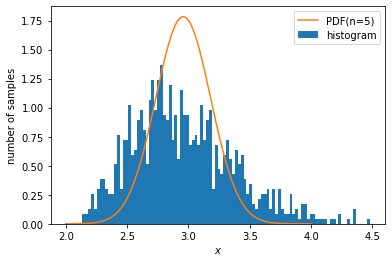

In [84]:
plt.hist(samples_5, bins =100, density = True, stacked = True, label = 'histogram')
plt.plot(x, pdf_5, label='PDF(n=5)')
plt.ylabel('y')
plt.xlabel('$x$')
plt.legend()

#### 3.b. При объеме выборки n = 10 и количестве выборок k = 1000:

(array([0.04493568, 0.        , 0.        , 0.        , 0.08987136,
        0.13480705, 0.        , 0.08987136, 0.13480705, 0.17974273,
        0.22467841, 0.58416387, 0.44935682, 0.26961409, 0.67403523,
        0.53922819, 0.80884228, 0.7639066 , 0.98858501, 0.7639066 ,
        0.67403523, 0.98858501, 1.16832774, 1.21326342, 1.39300615,
        1.48287751, 1.16832774, 1.2581991 , 1.16832774, 1.66262024,
        1.03352069, 1.30313478, 1.21326342, 1.03352069, 1.48287751,
        1.16832774, 1.16832774, 0.80884228, 1.21326342, 1.30313478,
        1.03352069, 0.98858501, 0.98858501, 0.80884228, 1.03352069,
        0.85377796, 0.58416387, 0.53922819, 0.58416387, 0.58416387,
        0.58416387, 0.58416387, 0.40442114, 0.44935682, 0.44935682,
        0.53922819, 0.35948546, 0.4942925 , 0.31454978, 0.22467841,
        0.13480705, 0.04493568, 0.13480705, 0.08987136, 0.13480705,
        0.13480705, 0.26961409, 0.04493568, 0.22467841, 0.13480705,
        0.04493568, 0.17974273, 0.        , 0.  

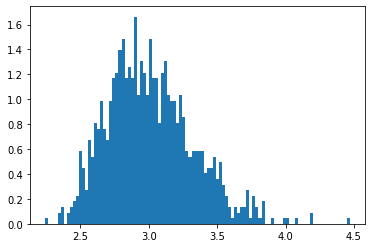

In [103]:
n = 10
samples_10 = np.array([]) # массив из выборочных средних
for i in range(1000): # для количества выборок 1000
    samp10 = exp_rv.rvs(n) # генерация выборки объемом n
    mean10 = sum(samp10)/n # вычисление выборочного среднего для выборки
    samples_10 = np.append(samples_10, mean10) # добавляем выборочное среднее в массив
plt.hist(samples_10, bins=100, density=True, stacked=True)

Определим значения параметров нормального распределения, которыми (согласно Ц.П.Т.) приближается распределение выборочных средних:

In [104]:
# при n = 10 и k = 1000
D_10 = D / n # дисперсия
sigma_10 = math.sqrt(D_10) # стандартное среднеквадратическое отклонение
E_10 = sum(samples_10) / 1000 # мат. ожидание
norm_10 = sts.norm(E_10, sigma_10) # нормальное распределение для расчетных характеристик экспоненциального распределения
x = np.linspace(2.5, 3.5, 100)
pdf_10 = norm_10.pdf(x) # плотность распределения

Строим гистограмму массива средних при n=10 и плотность, описывающую этот массив нормального распределения:

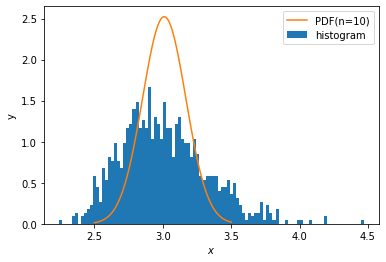

In [105]:
plt.hist(samples_10, bins =100, density = True, stacked = True, label = 'histogram')
plt.plot(x, pdf_10, label='PDF(n=10)')
plt.ylabel('y')
plt.xlabel('$x$')
plt.legend()

#### 3.c. При объеме выборки n = 50 и количестве выборок k = 1000:

(array([0.10767651, 0.        , 0.10767651, 0.        , 0.        ,
        0.        , 0.        , 0.21535303, 0.        , 0.        ,
        0.21535303, 0.21535303, 0.21535303, 0.32302954, 0.43070605,
        0.32302954, 0.43070605, 0.53838256, 0.64605908, 0.8614121 ,
        0.64605908, 0.96908862, 0.75373559, 1.29211816, 0.96908862,
        2.15353026, 1.18444164, 1.18444164, 1.93817723, 1.72282421,
        2.36888328, 2.36888328, 2.26120677, 2.58423631, 2.36888328,
        3.66100144, 2.04585375, 2.04585375, 2.4765598 , 3.44564841,
        2.26120677, 4.30706052, 2.15353026, 2.79958934, 3.12261888,
        3.44564841, 3.12261888, 3.44564841, 2.90726585, 2.58423631,
        2.58423631, 1.93817723, 3.3379719 , 2.26120677, 1.18444164,
        1.50747118, 1.18444164, 2.26120677, 1.39979467, 2.04585375,
        1.29211816, 2.26120677, 0.96908862, 0.75373559, 0.53838256,
        1.07676513, 0.53838256, 0.21535303, 0.75373559, 0.96908862,
        0.8614121 , 0.43070605, 0.64605908, 0.43

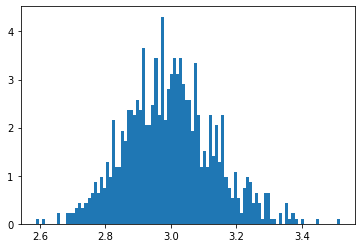

In [109]:
n = 50
samples_50 = np.array([]) # массив из выборочных средних
for i in range(1000): # для количества выборок 1000
    samp50 = exp_rv.rvs(n) # генерация выборки объемом n
    mean50 = sum(samp50)/n # вычисление выборочного среднего для выборки
    samples_50 = np.append(samples_50, mean50) # добавляем выборочное среднее в массив
plt.hist(samples_50, bins=100, density=True, stacked=True)

Определим значения параметров нормального распределения, которыми (согласно Ц.П.Т.) приближается распределение выборочных средних:

In [110]:
# при n = 50 и k = 1000
D_50 = D / n # дисперсия
sigma_50 = math.sqrt(D_50) # стандартное среднеквадратическое отклонение
E_50 = sum(samples_50) / 1000 # мат. ожидание
norm_50 = sts.norm(E_50, sigma_50) # нормальное распределение для расчетных характеристик экспоненциального распределения
x = np.linspace(2.5, 3.5, 100)
pdf_50 = norm_50.pdf(x) # плотность распределения

Строим гистограмму массива средних при n=10 и плотность, описывающую этот массив нормального распределения:

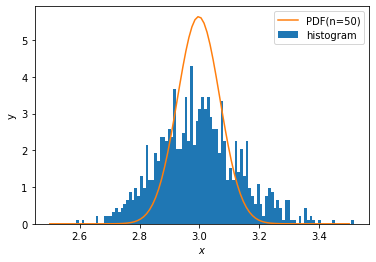

In [112]:
plt.hist(samples_50, bins =100, density = True, stacked = True, label = 'histogram')
plt.plot(x, pdf_50, label='PDF(n=50)')
plt.ylabel('y')
plt.xlabel('$x$')
plt.legend()

#### 3.d. При объеме выборки n = 150 и количестве выборок k = 1000:

(array([0.39206831, 0.        , 0.19603416, 0.19603416, 0.19603416,
        0.19603416, 0.39206831, 0.19603416, 0.58810247, 0.19603416,
        0.78413663, 0.19603416, 0.58810247, 1.3722391 , 0.78413663,
        0.78413663, 1.17620494, 1.56827326, 1.76430741, 1.17620494,
        1.96034157, 2.35240988, 3.13654651, 1.96034157, 2.35240988,
        3.33258067, 2.35240988, 3.72464898, 4.50878561, 2.94051235,
        4.70481977, 2.94051235, 4.90085392, 4.50878561, 5.29292224,
        5.29292224, 4.50878561, 5.88102471, 2.94051235, 4.50878561,
        4.50878561, 4.50878561, 3.92068314, 3.72464898, 3.92068314,
        3.92068314, 3.13654651, 2.54844404, 5.88102471, 5.68499055,
        4.50878561, 3.33258067, 4.1167173 , 3.92068314, 3.72464898,
        3.52861482, 4.31275145, 3.52861482, 3.92068314, 2.7444782 ,
        2.7444782 , 2.54844404, 2.7444782 , 2.15637573, 2.35240988,
        2.15637573, 1.76430741, 1.17620494, 0.19603416, 0.39206831,
        0.78413663, 1.17620494, 1.76430741, 0.98

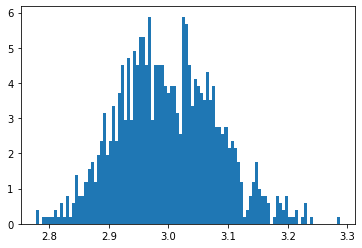

In [113]:
n = 150
samples_150 = np.array([]) # массив из выборочных средних
for i in range(1000): # для количества выборок 1000
    samp150 = exp_rv.rvs(n) # генерация выборки объемом n
    mean150 = sum(samp150)/n # вычисление выборочного среднего для выборки
    samples_150 = np.append(samples_150, mean150) # добавляем выборочное среднее в массив
plt.hist(samples_150, bins=100, density=True, stacked=True)

In [114]:
# при n = 150 и k = 1000
D_150 = D / n # дисперсия
sigma_150 = math.sqrt(D_150) # стандартное среднеквадратическое отклонение
E_150 = sum(samples_150) / 1000 # мат. ожидание
norm_150 = sts.norm(E_150, sigma_150) # нормальное распределение для расчетных характеристик экспоненциального распределения
x = np.linspace(2.75, 3.25, 100)
pdf_150 = norm_150.pdf(x) # плотность распределения

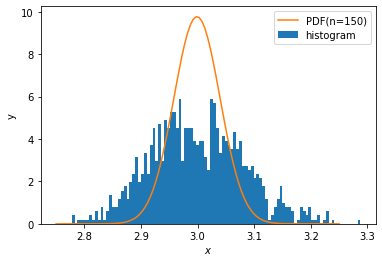

In [117]:
plt.hist(samples_150, bins =100, density = True, stacked = True, label = 'histogram')
plt.plot(x, pdf_150, label='PDF(n=150)')
plt.ylabel('y')
plt.xlabel('$x$')
plt.legend()

Построим общий график для всех нормальных распределений:

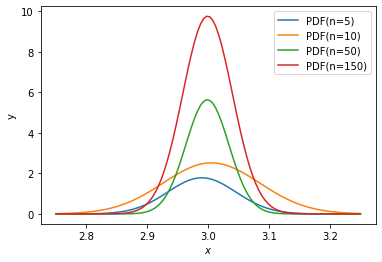

In [118]:
plt.plot(x, pdf_5, label='PDF(n=5)')
plt.plot(x, pdf_10, label='PDF(n=10)')
plt.plot(x, pdf_50, label='PDF(n=50)')
plt.plot(x, pdf_150, label='PDF(n=150)')
plt.ylabel('y')
plt.xlabel('$x$')
plt.legend()

Построим общий график для всех гистограмм:

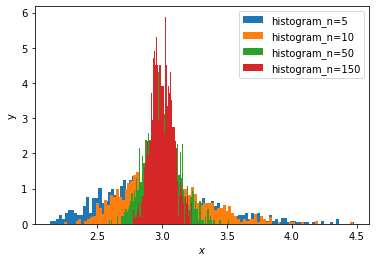

In [119]:
plt.hist(samples_5, bins =100, density = True, stacked = True, label = 'histogram_n=5')
plt.hist(samples_10, bins =100, density = True, stacked = True, label = 'histogram_n=10')
plt.hist(samples_50, bins =100, density = True, stacked = True, label = 'histogram_n=50')
plt.hist(samples_150, bins =100, density = True, stacked = True, label = 'histogram_n=150')
plt.ylabel('y')
plt.xlabel('$x$')
plt.legend()

# Вывод:

Видно, что с увеличением объема выборки (n) гистограмма все больше и больше начинает напоминать нормальное распределение: 
гистограмма сужается к своему среднему значению 3.0, разброс уменьшается. С ростом n точность нормальной аппроксимации увеличивается,
что подтверждает справедливость центральной предельной теоремы.